In [3]:
import os
import matplotlib.pyplot as plt
import shutil
import numpy as np

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam

In [5]:
# Routes
test_dir = '../data/raw/test/test'
subset_dir = '../data/raw/test-images'
model_dir = '../models/optimized-model.keras'

<h4>Testear modelo elegido</h4>

In [6]:
model = load_model(model_dir)
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 200, 200, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 200, 200, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 100, 100, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 100, 100, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 100, 100, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 50, 50, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 50, 50, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 50, 50, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 25, 25, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 80000)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │    40,960,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 2)              │         1,026 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 123,745,640 (472.05 MB)

 Trainable params: 41,248,546 (157.35 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 82,497,094 (314.70 MB)

Ya que en la carpeta test las imágenes no están clasificadas en clases, por lo que no sabría cómo obtener las métricas del entrenamiento del modelo sobre ellas, y debido a la imposibilidad de clasificar manualmente 12500 imágenes en un periodo de tiempo razonable, para hacer pruebas sobre esta carpeta se opta por seleccionar 100 imágenes al azar y clasificarlas en dos carpetas usando el modelo para poder comprobar manualmente la eficacia del mismo sobre ellas. Aunque teniendo en cuenta que al ser una cantidad tan pequeña es posible que las métricas no sean 100% reales.

<h4>Crear directorio para almacenar 100 imágenes de test al azar</h4>

In [7]:
if not os.path.exists(subset_dir):
    os.makedirs(subset_dir)

all_images = [f for f in os.listdir(test_dir) if f.endswith('.jpg')]
selected_images = all_images[:100]

for img_name in selected_images:
    shutil.copy(os.path.join(test_dir, img_name), os.path.join(subset_dir, img_name))

<h4>Crear carpetas para dividir imágenes usando el modelo</h4>

In [8]:
dogs_dir = os.path.join(subset_dir, 'dogs')
cats_dir = os.path.join(subset_dir, 'cats')

os.makedirs(dogs_dir, exist_ok=True)
os.makedirs(cats_dir, exist_ok=True)

<h4>Clasificar imágenes usando el modelo</h4>

In [9]:
for img_name in selected_images:
    img_path = os.path.join(subset_dir, img_name)
    img = image.load_img(img_path, target_size=(200, 200))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0

    prediction = model.predict(img_array)
    predicted_class = 'cats' if prediction[0][0] > 0.5 else 'dogs'

    target_dir = dogs_dir if predicted_class == 'dogs' else cats_dir
    shutil.move(img_path, os.path.join(target_dir, img_name))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━

<h4>Análisis de la clasificación de las imágenes</h4>

In [10]:
categories = ['Cats', 'Dogs']
total_images = [49, 51]
errors = [4, 6]
corrects = [total - error for total, error in zip(total_images, errors)]

In [12]:
accuracy = [correct / total * 100 for correct, total in zip(corrects, total_images)]
error_rate = [error / total * 100 for error, total in zip(errors, total_images)]

print("Accuracy:", accuracy)
print("Error rate:", error_rate)

Accuracy: [91.83673469387756, 88.23529411764706]
Error rate: [8.16326530612245, 11.76470588235294]


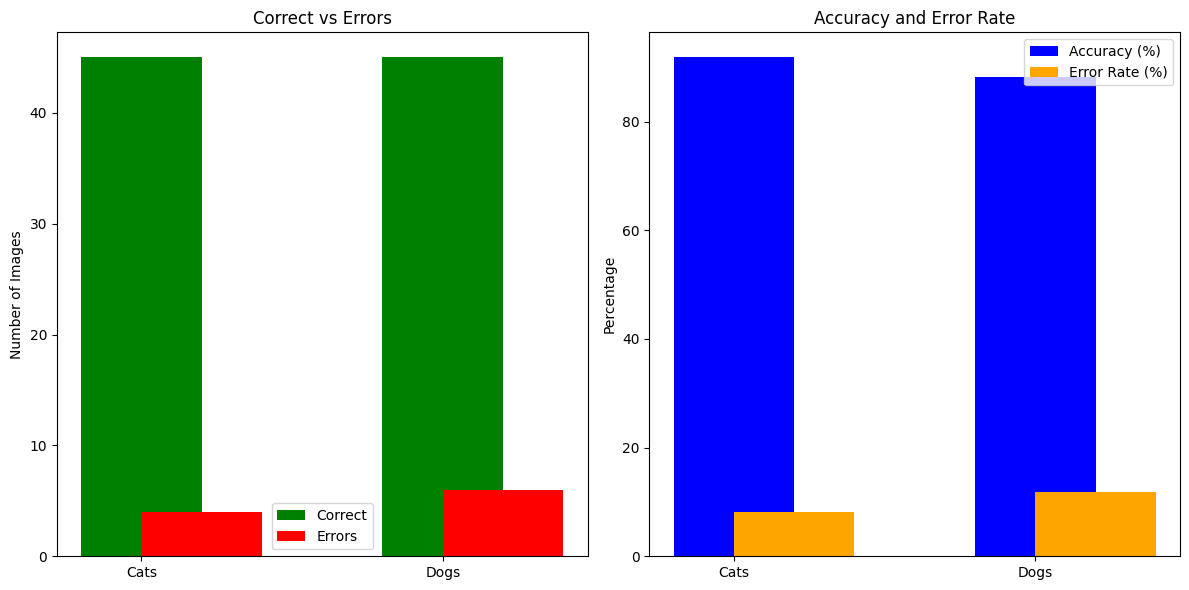

In [13]:
x = range(len(categories))
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].bar(x, corrects, color='green', label='Correct', width=0.4, align='center')
ax[0].bar(x, errors, color='red', label='Errors', width=0.4, align='edge')
ax[0].set_title('Correct vs Errors')
ax[0].set_xticks(x)
ax[0].set_xticklabels(categories)
ax[0].set_ylabel('Number of Images')
ax[0].legend()

ax[1].bar(x, accuracy, color='blue', label='Accuracy (%)', width=0.4, align='center')
ax[1].bar(x, error_rate, color='orange', label='Error Rate (%)', width=0.4, align='edge')
ax[1].set_title('Accuracy and Error Rate')
ax[1].set_xticks(x)
ax[1].set_xticklabels(categories)
ax[1].set_ylabel('Percentage')
ax[1].legend()

plt.tight_layout()
plt.show()